In [15]:

import pandas as pd
import numpy as np

Lendo a Database

In [16]:
df = pd.read_csv("energia_eletrica_consumo.csv", decimal=",", sep=";")
df

,Data,Energia elétrica - consumo - quantidade - GWh - Eletrobras - ELETRO_CEET,Unnamed: 2
0,1952,8513.0,NaN
1,1953,8588.0,NaN
2,1954,9759.0,NaN
3,1955,11289.0,NaN
4,1956,12634.0,NaN
...,...,...,...
65,2017,465039.0,NaN
66,2018,471643.0,NaN
67,2019,480782.0,NaN
68,2020,473944.0,NaN


Dropando a coluna com valores nulos

In [17]:
df.pop(df.columns[2])
df

,Data,Energia elétrica - consumo - quantidade - GWh - Eletrobras - ELETRO_CEET
0,1952,8513.0
1,1953,8588.0
2,1954,9759.0
3,1955,11289.0
4,1956,12634.0
...,...,...
65,2017,465039.0
66,2018,471643.0
67,2019,480782.0
68,2020,473944.0


Criando uma matriz com X = Indices e Y = Energia elétrica

In [18]:
indices = range(len(df))
Y = [float(x) for x in list(df.iloc[:,1])]

M = np.array([indices, Y])
M = M.transpose()
M

array([[0.00000e+00, 8.51300e+03],
       [1.00000e+00, 8.58800e+03],
       [2.00000e+00, 9.75900e+03],
       [3.00000e+00, 1.12890e+04],
       [4.00000e+00, 1.26340e+04],
       [5.00000e+00, 1.40830e+04],
       [6.00000e+00, 1.60770e+04],
       [7.00000e+00, 1.71620e+04],
       [8.00000e+00, 1.83460e+04],
       [9.00000e+00, 1.96300e+04],
       [1.00000e+01, 2.18570e+04],
       [1.10000e+01, 2.26180e+04],
       [1.20000e+01, 2.35210e+04],
       [1.30000e+01, 2.42680e+04],
       [1.40000e+01, 2.64940e+04],
       [1.50000e+01, 2.79880e+04],
       [1.60000e+01, 3.13990e+04],
       [1.70000e+01, 3.45140e+04],
       [1.80000e+01, 3.81520e+04],
       [1.90000e+01, 4.48460e+04],
       [2.00000e+01, 4.98390e+04],
       [2.10000e+01, 5.49280e+04],
       [2.20000e+01, 6.16300e+04],
       [2.30000e+01, 6.81800e+04],
       [2.40000e+01, 7.16349e+04],
       [2.50000e+01, 8.08047e+04],
       [2.60000e+01, 9.00705e+04],
       [2.70000e+01, 1.01146e+05],
       [2.80000e+01,

Usando a função criada para encontrar dos coeficientes a e b para a regressão linear da base de dados

In [19]:
import funcs_propias

a, b = funcs_propias.regressaoLinear(M)
print(f"a = {a}\nb = {b}")

a = 7803.510967372367
b = -70114.4631859756


Plotando as duas bases de dados

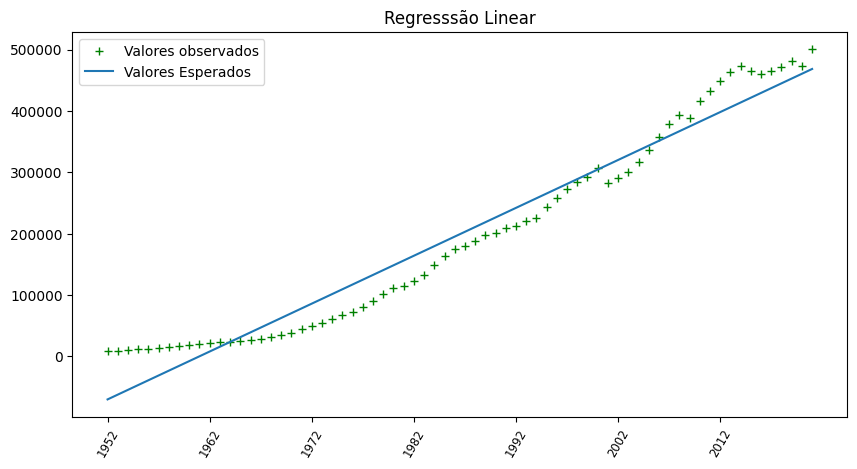

In [43]:
y_esperado = []
for i in indices:
    y_esperado.append(a*i + b)

from turtle import width
import matplotlib.pyplot as plt

ticks_interest = [i for i in np.arange(0,69,10)]
label_interest = []
for i in ticks_interest:
    label_interest.append(int(df.iloc[i][0]))

fig = plt.figure(figsize=(10,5))
plt.plot(M[:,1], "g+", label="Valores observados")
plt.plot(y_esperado, label="Valores Esperados")
plt.legend()
plt.xticks(ticks_interest, labels=label_interest)
plt.tick_params(axis="x", rotation=60, labelsize="small")
plt.title("Regresssão Linear")
plt.show()